In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from goorgrow.fig2 import label_axes

In [28]:
plt.style.use('default')
plt.style.use('nature_style.mplstyle')

In [2]:
df = pd.read_csv('treatment.csv')

In [3]:
df.head()

,r_d,theta,repetition,kappa,genetic_entropy,phenotype_entropy,rectime
0,0.0,0.0,0,-1.635913,2.687159,0.694025,129.0
1,0.0,0.0,1,-0.865879,2.060866,0.807282,154.0
2,0.0,0.0,2,-1.545359,2.737255,0.758394,140.0
3,0.0,0.0,3,-1.495602,2.615735,0.744453,165.0
4,0.0,0.0,4,-1.837688,2.675741,0.650427,122.0


In [4]:
df['growthrate'] = np.log(1000) / df.rectime

<Axes: >

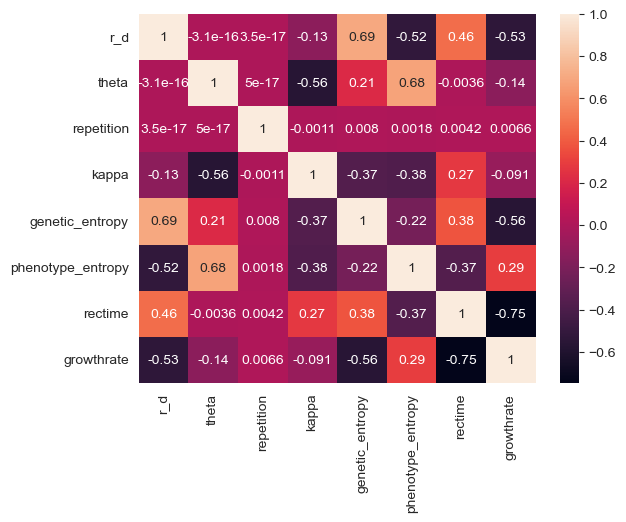

In [5]:
# plot a correlation matrix
sns.heatmap(df.corr(), annot=True)

C:\ProgramData\anaconda3\envs\py311\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)


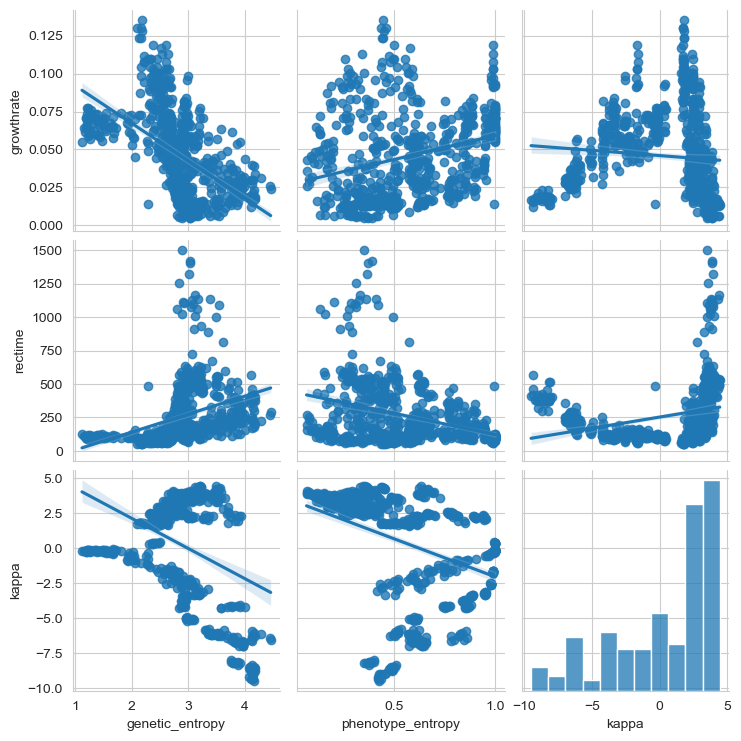

In [6]:
# plot a correlation seaborn plot
sns.pairplot(df, y_vars=['growthrate', 'rectime', 'kappa'], x_vars=['genetic_entropy', 'phenotype_entropy', 'kappa'], kind='reg', palette='viridis', plot_kws=dict(ci=95))

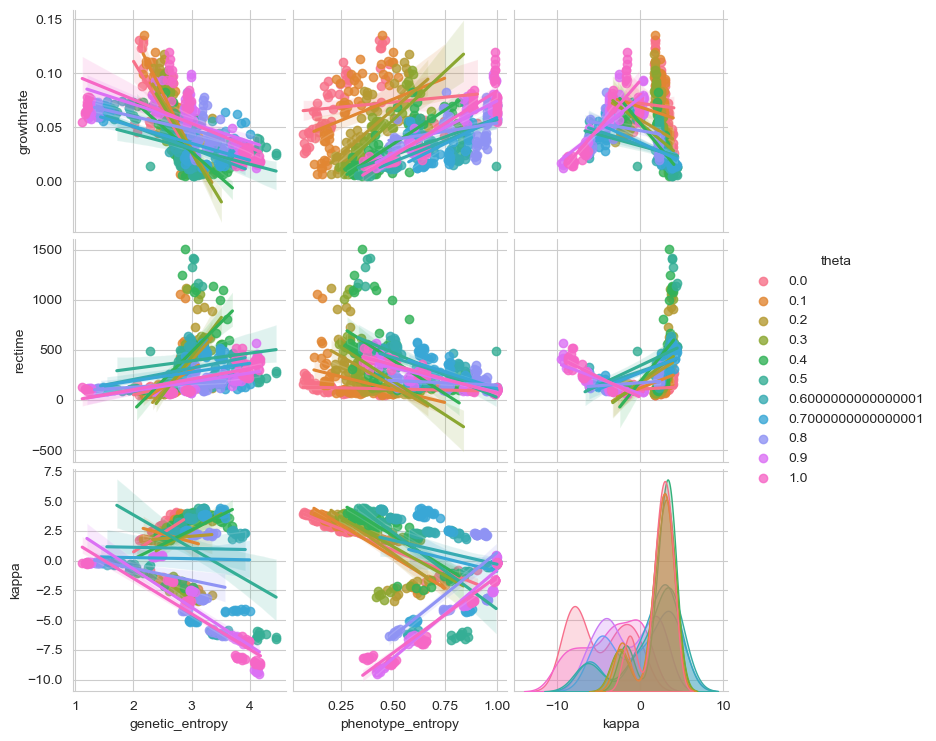

In [7]:
sns.pairplot(df, y_vars=['growthrate', 'rectime', 'kappa'], x_vars=['genetic_entropy', 'phenotype_entropy', 'kappa'], kind='reg', hue='theta', plot_kws=dict(ci=95), palette='husl')

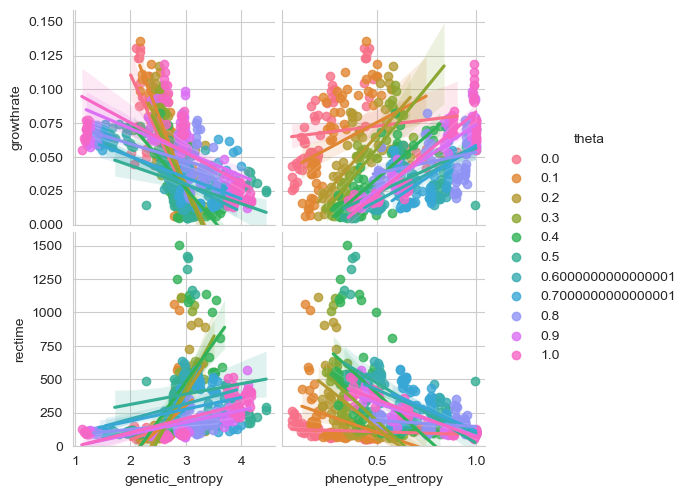

In [8]:
g = sns.pairplot(df, y_vars=['growthrate', 'rectime'], x_vars=['genetic_entropy', 'phenotype_entropy'], kind='reg', hue='theta', plot_kws=dict(ci=95), palette='husl')
g.set(ylim=0)

(0.0, 1578.917269163215)

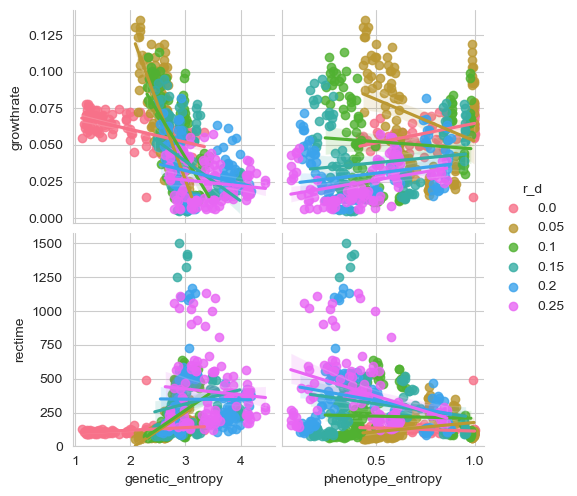

In [9]:
sns.pairplot(df, y_vars=['growthrate', 'rectime'], x_vars=['genetic_entropy', 'phenotype_entropy'], kind='reg', hue='r_d', plot_kws=dict(ci=95), palette='husl')
plt.ylim(0)

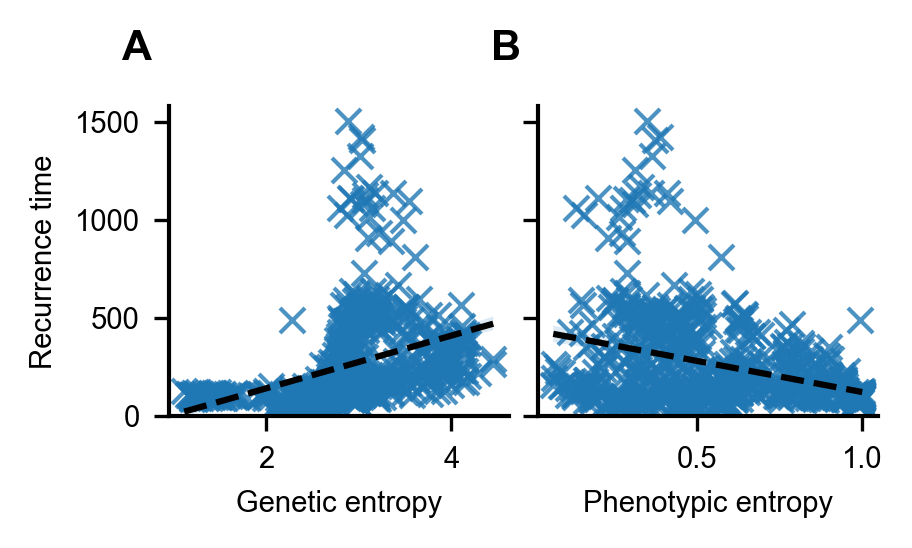

In [31]:
figsize = 3, 3.
g = sns.pairplot(df, y_vars=['rectime'], x_vars=['genetic_entropy', 'phenotype_entropy'], kind='reg', palette='viridis', height=figsize[1]/2, aspect=figsize[0]/figsize[1], markers='x')
g.axes[0][0].set_xlabel('Genetic entropy')
g.axes[0][1].set_xlabel('Phenotypic entropy')
g.axes[0][0].set_ylim(0)
for ax in g.axes.flatten():
    for line in ax.lines:
        line.set_color('k')
        # set linestyle to dashed for the regression lines
        line.set_linestyle('--')

g.set(ylabel='Recurrence time')
label_axes(g.fig)
plt.savefig('recurrence_time_vs_entropy.pdf', bbox_inches='tight')